## Aggregate the network with an optimization method

In [2]:
import sys
sys.path.append('../src')
import utils
import models as m

In [3]:
nodes_df, wind_df, solar_df = utils.import_data_county()
TimeSeries = {'wind': wind_df.iloc[:, 1:], 'solar': solar_df.iloc[:, 1:]};

In [4]:
network = utils.Network(nodes_df, TimeSeries)

The 'features' dictionary has been created and can be accessed as '.features'
It is a dictionary with keys for each node in range(0, 67).
Each value is a dictionary with the features of that node.

Example structure:
network.features[0].keys() = dict_keys(['position', 'time_series', 'duration_curves', 'ramp_duration_curves', 'correlation'])

Details:
  - Position: A tuple (latitude, longitude) of that node.
  - Time series: A dictionary with keys for each time series type in dict_keys(['wind', 'solar'])
    and values as the time series itself.
  - Duration Curves: A dictionary with keys for each time series type in dict_keys(['wind', 'solar'])
    and values as the duration curve of the time series.
  - Ramp Duration Curves (RDCs): A dictionary with keys for each time series type dict_keys(['wind', 'solar'])
    and values as the RDC (found by differentiating and subsequently sorting) of the time series.
  - Correlation: A dictionary with keys as tuples of types of time series
    and

In [5]:
node_features = network.features;

In [6]:
n_repr = 10
opti = m.AggregationOptimizer(node_features, n_repr)

In [7]:
weights = {
                'position': 1.0,
                'time_series': 1.0,
                'duration_curves': 1.0,
                'rdc': 1.0,
                'correlation': 1.0
            }

u_results, z_results = opti.optimize(weights)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-09-06
Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i7-9750H CPU @ 2.60GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 4557 rows, 4556 columns and 13534 nonzeros
Model fingerprint: 0x9c3022af
Variable types: 0 continuous, 4556 integer (4556 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [9e-02, 5e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+01]
Presolve time: 0.03s
Presolved: 4557 rows, 4556 columns, 13534 nonzeros
Variable types: 0 continuous, 4556 integer (4556 binary)
Found heuristic solution: objective 41.0535153

Root relaxation: objective 3.107818e+01, 638 iterations, 0.02 seconds (0.02 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexp

In [8]:
visuals = utils.Visualization(network, u_results, n_repr, save_fig=True)

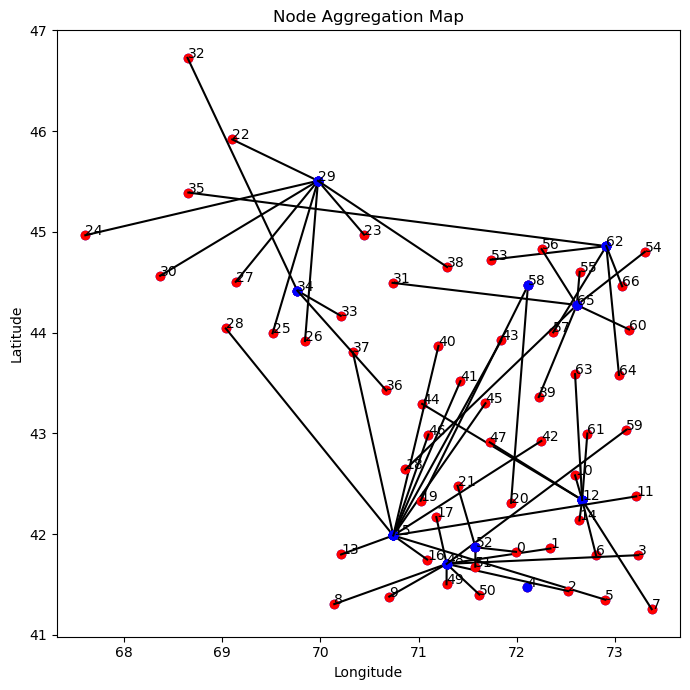

Figure saved as opti_agg_map_67_to_67.png at ../results/


In [9]:
visuals.plot_map()

c:\Users\g630d\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Clusters:
Cluster 0: Nodes [0, 17, 32, 33, 34, 36, 56, 59]
Cluster 1: Nodes [5, 11, 13, 15, 28, 41, 42, 43, 45]
Cluster 2: Nodes [19, 20, 58]
Cluster 3: Nodes [1, 2, 8, 24, 25, 26, 27, 29, 30, 38, 44, 48, 61]
Cluster 4: Nodes [4]
Cluster 5: Nodes [3, 18, 31, 39, 49, 54, 60, 65]
Cluster 6: Nodes [7, 9, 21, 22, 23, 50, 51, 52, 57]
Cluster 7: Nodes [6, 12, 14, 35, 37, 53, 62, 63, 64, 66]
Cluster 8: Nodes [16]
Cluster 9: Nodes [10, 40, 46, 47, 55]

Cluster Centers:
[[ 4.38246823e+01  7.09783348e+01  1.39900947e-01 ... -3.10293513e-01
  -3.63343625e-01  3.67868869e-01]
 [ 4.28026253e+01  7.14779632e+01  1.72954878e-01 ... -3.56158233e-01
  -4.26613149e-01  1.57818184e-01]
 [ 4.30374813e+01  7.16908743e+01  7.40557100e-01 ... -3.91657480e-01
  -4.19456367e-01 -8.79098740e-03]
 ...
 [ 4.36679655e+01  7.20433878e+01  2.38157370e-01 ... -3.43076440e-01
  -3.79781410e-01  2.12962444e-01]
 [ 4.17485760e+01  7.10870620e+01  2.64564300e-01 ... -4.24897760e-01
  -4.97905600e-01  1.05854864e-01]
 [ 4

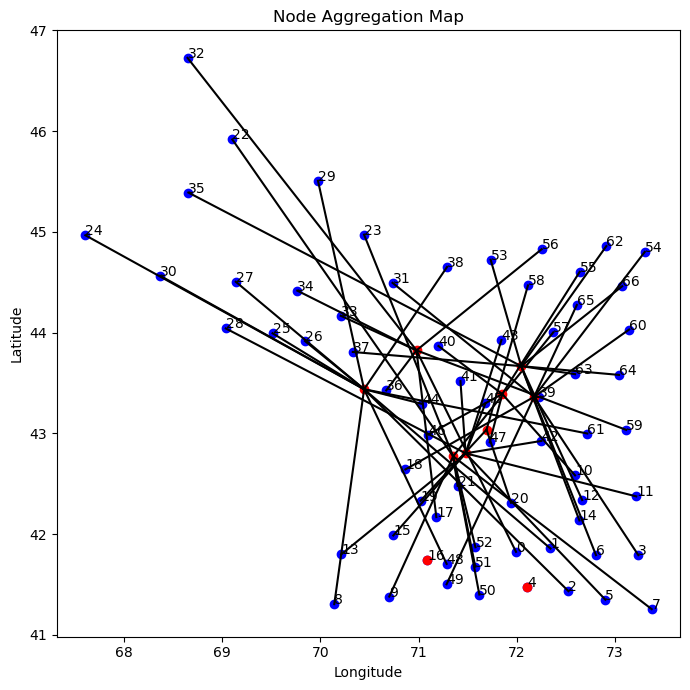

Figure saved as kmeans_agg_map_67_to_10.png at ../results/


In [10]:
aggregator = m.AggregationClustering(node_features, n_repr)
clusters_KMeans, cluster_centers_KMeans, labels_KMeans = aggregator.cluster_KMeans()

print("Clusters:")
for cluster_id, nodes in clusters_KMeans.items():
    print(f"Cluster {cluster_id}: Nodes {nodes}")

print("\nCluster Centers:")
print(cluster_centers_KMeans)

visuals.plot_map(method='kmeans', kmeans_cluster_centers=cluster_centers_KMeans, labels=labels_KMeans, AggregationClustering=aggregator)

Clusters:
Cluster 0: Nodes [20]
Cluster 1: Nodes [0, 17, 32, 33, 34, 36, 56, 59]
Cluster 2: Nodes [19, 58]
Cluster 3: Nodes [10, 40, 46, 47, 55]
Cluster 4: Nodes [11, 16, 41, 42, 45]
Cluster 5: Nodes [9, 21, 22, 50, 51, 52, 57]
Cluster 6: Nodes [5, 6, 7, 12, 13, 14, 15, 23, 28, 35, 37, 43, 53, 62, 63, 64, 66]
Cluster 7: Nodes [1, 2, 3, 8, 24, 26, 27, 29, 30, 31, 38, 39, 44, 48]
Cluster 8: Nodes [18, 25, 49, 54, 60, 61, 65]
Cluster 9: Nodes [4]

Cluster Centers:
[20, 36, 19, 47, 41, 52, 66, 48, 54, 4]


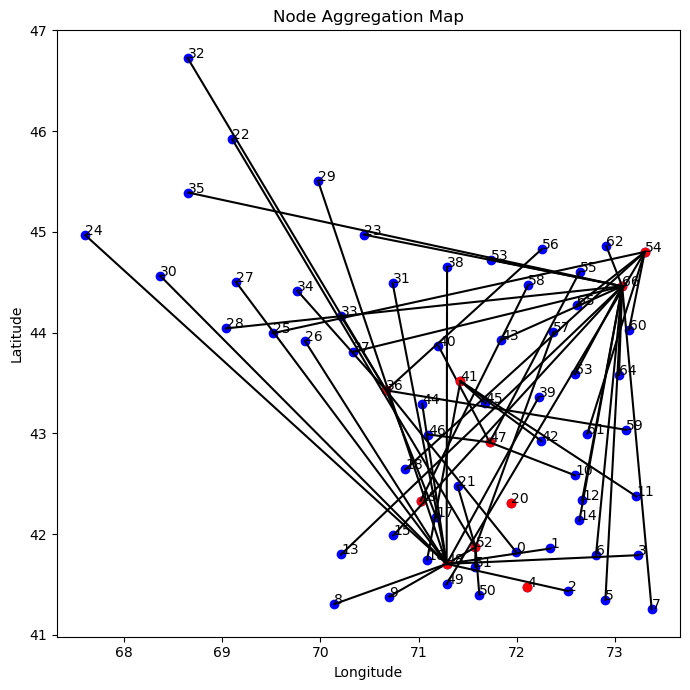

Figure saved as kmedoids_agg_map_67_to_10.png at ../results/


In [11]:
clusters_KMedoids, cluster_centers_KMedoids = aggregator.cluster_KMedoids()

print("Clusters:")
for cluster_id, nodes in clusters_KMedoids.items():
    print(f"Cluster {cluster_id}: Nodes {nodes}")

print("\nCluster Centers:")
print(cluster_centers_KMedoids)

visuals.plot_map(method='kmedoids', kmedoids_medoids=cluster_centers_KMedoids, cluster_mapping=clusters_KMedoids)

In [12]:
import pandas as pd

demand_hist = pd.read_csv("../DATA/Dev/demand_hist/county_demand_local_hourly_1996.csv")
CF_county = pd.read_csv("../DATA/Dev/county-level-CFs/hist/solar/cf_local_county_1996.csv")
print(CF_county.shape, demand_hist.shape)
print(demand_hist.columns)
print(CF_county.columns)


(8760, 68) (8760, 68)
Index(['Time', '23029', '9003', '9013', '9015', '25019', '50027', '33019',
       '33001', '33005', '33017', '44005', '50015', '50017', '50003', '50019',
       '50023', '50013', '23001', '44001', '25007', '23013', '23023', '23015',
       '33013', '25017', '9009', '9005', '25027', '25003', '25011', '25015',
       '25021', '23021', '23025', '23003', '23017', '23019', '33003', '33011',
       '44007', '44009', '50007', '50001', '50021', '50025', '50011', '25009',
       '25023', '25013', '44003', '33015', '23031', '23005', '23007', '9011',
       '25025', '23027', '23009', '25001', '23011', '9007', '9001', '33007',
       '50005', '50009', '25005', '33009'],
      dtype='object')
Index(['Unnamed: 0', '23029', '09003', '09013', '09015', '25019', '50027',
       '33019', '33001', '33005', '33017', '44005', '50015', '50017', '50003',
       '50019', '50023', '50013', '23001', '44001', '25007', '23013', '23023',
       '23015', '33013', '25017', '09009', '09005', '250